In [1]:
from __future__  import print_function, division
import pandas as pd
import numpy as np
import os
import scipy as sp
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")
import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
"""
1.citibike csv file from Jan 2015, download and move data to PUIDATA
2.Simple bash commands can be run by preceding them with !, 
  but more complex command lines with variable arguments need to be build as strng and run with os.system
"""

def getCitiBikeCSV(datestring):
    """
    looks for existing files, download a file if none is there, unzips it, moves it
    """
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
#downloading 201501 citibike data
datestring = '201501'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
#read in data
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


<function matplotlib.pyplot.show>

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['STXihei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


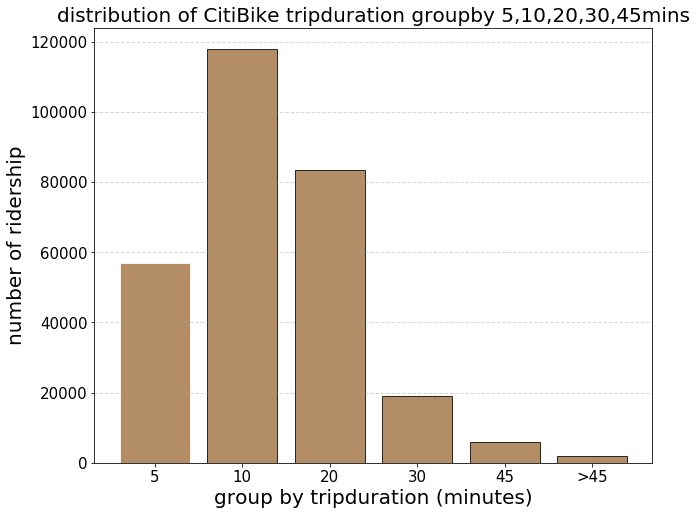

In [5]:
#group by tripduration
bins = [0, 300, 600, 1200, 1800, 2700, 2825827]
#name every group
group_tripduration = ['5mins', '10mins', '20mins', '30mins', '45mins', 'longer time']
#create group_tripduration 
df['group_tripduration'] = pd.cut(df['tripduration'], bins, labels=group_tripduration)
#count the number according to the group
group_minute=df.groupby('group_tripduration')['group_tripduration'].agg(len)
#plot the histrogram of tripduration
plt.rc('font', family='STXihei', size=15)
a=np.array([1,2,3,4,5,6])
plt.figure(figsize=(10,8))
plt.bar([1,2,3,4,5,6],group_minute,color='#9F713F',alpha=0.8,align='center',edgecolor='white')
plt.xlabel('group by tripduration (minutes)', fontsize=20)
plt.ylabel('number of ridership',fontsize=20)
plt.title('distribution of CitiBike tripduration groupby 5,10,20,30,45mins', fontsize=20)         
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='y',alpha=0.4)
plt.xticks(a,('5','10','20','30', '45','>45'))
plt.show

## Figure 1: The plot is about histrogram of tripduration group by 5,10,20,30,45mins. It indicates most ridership's tripduration is under 10 and 20 minutes. It makes sense that riding bike is exhausting and often happens in short distance trip.